# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

df = pd.read_csv('data/human_body_temperature.csv')
np.random.seed(42)

In [3]:
# Your work here.

# 1) Is the distribution of body temperatures normal?
As shown below, the empiracal CDF of the data closely matches the CDF of the a theorictal normal distribution with the same mean and standard deviation of the data. We can conclude that the data is reasonable normal

In [14]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1 ) / n

    return x, y

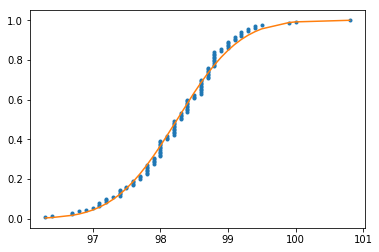

In [40]:
x,y = ecdf(df.temperature)
_ = plt.plot(x, y, marker='.',linestyle = 'none')
_ = plt.plot(x, norm.cdf(x, np.mean(x),np.std(x)))

# 2) Is the sample size large? Are the observations independent?
The number of oberservations with  a body temperature above 98.6 and below 98.6 indicate that the dataset is sufficiently large. Given the description of the dataset, it is reasonable to assume that the data was collected randomly and the body temperatures of individauls are independent of one another

In [46]:
print('Number of observations thar are at least 98.6 =',len(df[df['temperature'] >= 98.6]))
print('Number of observations thar are less than 98.6 =',len(df[df['temperature'] < 98.6]))

Number of observations thar are at least 98.6 = 49
Number of observations thar are less than 98.6 = 81


# 3) Is the true population mean really 98.6 degrees F?
Given that the p values for the tests shown below are lower than the signifcance level of 0.5, we reject the null hypothesis that the true population mean is 98.6 in favor of the alternative hypothesis that the mean is not equal to 98.6.  
A one-sample test is used in this situation beacuse we are concerned about the parameters of only one population, not the comparison of two different populations.  
The standard deviation of the population is unknown, thus a t-test would be more appropriate. The p-values for the t-test and the z-test differ because the z test is underestimating the standard deviation, thus resulting in a smaller p-value.

In [48]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

## Bootstrap Hypothesis Test
$H_{0}$ : $\mu$ = 98.6  
$H_{a}$ : $\mu$ $\neq$ 98.6  
$\alpha = 0.05$

In [129]:
obs_mean = df.temperature.mean()
temp_shifted = df.temperature - obs_mean + 98.6

bs_replicates = draw_bs_reps(temp_shifted, np.mean, size=10000)
p = np.sum(bs_replicates <= obs_mean)/len(bs_replicates)
print('p value = ', p)

p value =  0.0


## Z-Test
$H_{0}$ : $\mu$ = 98.6  
$H_{a}$ : $\mu$ $\neq$ 98.6  
$\alpha = 0.05$

In [87]:
ztest(df.temperature, value = 98.6, alternative = 'two-sided')

(-5.4548232923645195, 4.9021570141012155e-08)

## T-Test
$H_{0}$ : $\mu$ = 98.6  
$H_{a}$ : $\mu$ $\neq$ 98.6  
$\alpha = 0.05$

In [91]:
scipy.stats.ttest_1samp(df.temperature,popmean = 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

# 4) Draw a small sample of size 10 from the data and repeat both frequentist tests.

A z-test is the correct one to use in this situation because the standard deviation os the population (those in the dataset) is known.  
The p-values are signifcantly higher than those calculated above. The p value for the t-test is also higher than that of the z-test. This tells us that the t-test is a not the best test when the standard deviation is known and that it can overestimate the standard deviation

In [105]:
sample = np.random.choice(df.temperature, 10)

In [106]:
ztest(sample, value = 98.6, alternative = 'two-sided')

(-1.4164010556563098, 0.15665811502899377)

In [107]:
scipy.stats.ttest_1samp(sample,popmean = 98.6)

Ttest_1sampResult(statistic=-1.4164010556563098, pvalue=0.190325553112954)

# 5) At what temperature should we consider someone's temperature to be "abnormal"?

Based on the 95% CI (t-interval) shown below. We should consider someone's temperature is above 98.38 degrees or below 98.12 degrees

## Bootstap CI

In [108]:
bs_replicates = draw_bs_reps(df.temperature, np.mean, size=10000)

In [113]:
lb,ub = np.percentile(bs_replicates, [2.5,97.5])
err_mar = (ub-lb)/2
print('95% CI:', lb,'-', ub)

95% CI: 98.12307692307692 - 98.37769230769233


## T Interval

In [121]:
scipy.stats.t.interval(alpha = 0.95, df = len(df)-1, loc = obs_mean, scale = scipy.stats.sem(df.temperature))

(98.12200290560804, 98.37645863285351)

## Z Interval

In [122]:
scipy.stats.norm.interval(.95, loc = obs_mean, scale = np.std(df.temperature))

(96.81775582674824, 99.68070571171332)

# 6) Is there a significant difference between males and females in normal temperature?
$H_{0}$ : $\mu_{males}$ = $\mu_{females}$  
$H_{a}$ : $\mu_{males}$ $\neq$ $\mu_{females}$  
$\alpha = 0.05$

Based on the 2-sample t-test shown below, we reject the null hypothesis that there is no significant difference between males and females in normal temperatures in favor of the alternative hypothesis that theere means are not equal.  

A 2-sample t-test was chosen given that we are interested in the difference in parameters of two different populations where the true standard deviation is unknown

In [126]:
m = df[df['gender'] == 'M'].temperature
f = df[df['gender'] == 'F'].temperature

scipy.stats.ttest_ind(m,f)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)